## Name : Thota Siddartha

## Reg No : BL.EN.U4AIE21132

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain.Please plot the
amplitude part of the spectral components and observe it.

In [3]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

audio_signal, sampling_rate = librosa.load("my_statement.wav")

fft_result = np.fft.fft(audio_signal)
amplitudes = np.abs(fft_result)

freqs = np.fft.fftfreq(len(audio_signal), d=1/sampling_rate)

print("FFT Result:\n", fft_result)
print("Amplitudes:\n", amplitudes)
print("Frequencies:\n", freqs)



FFT Result:
 [-5.80058904-2.22044605e-15j  5.05635223-3.86654265e+00j
 -1.43522961+7.29022208e+00j ... -4.30268937+7.06593388e+00j
 -1.43522961-7.29022208e+00j  5.05635223+3.86654265e+00j]
Amplitudes:
 [5.80058904 6.36528475 7.43015625 ... 8.27288084 7.43015625 6.36528475]
Frequencies:
 [ 0.          0.20292096  0.40584191 ... -0.60876287 -0.40584191
 -0.20292096]


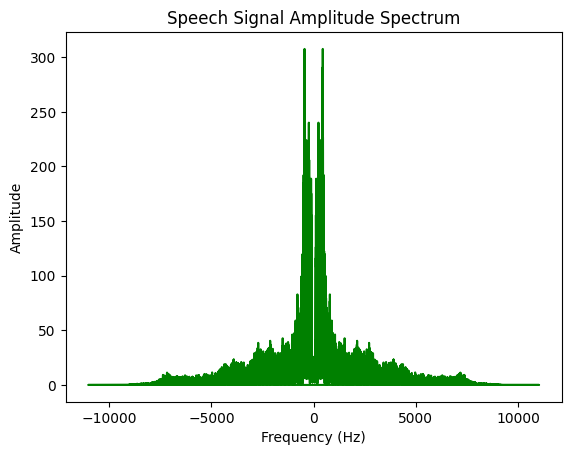

In [4]:
plt.plot(freqs, amplitudes, color="green")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()


A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

In [5]:
time_domain_signal = np.fft.ifft(fft_data)
time_domain_signal = time_domain_signal[:len(signal)]


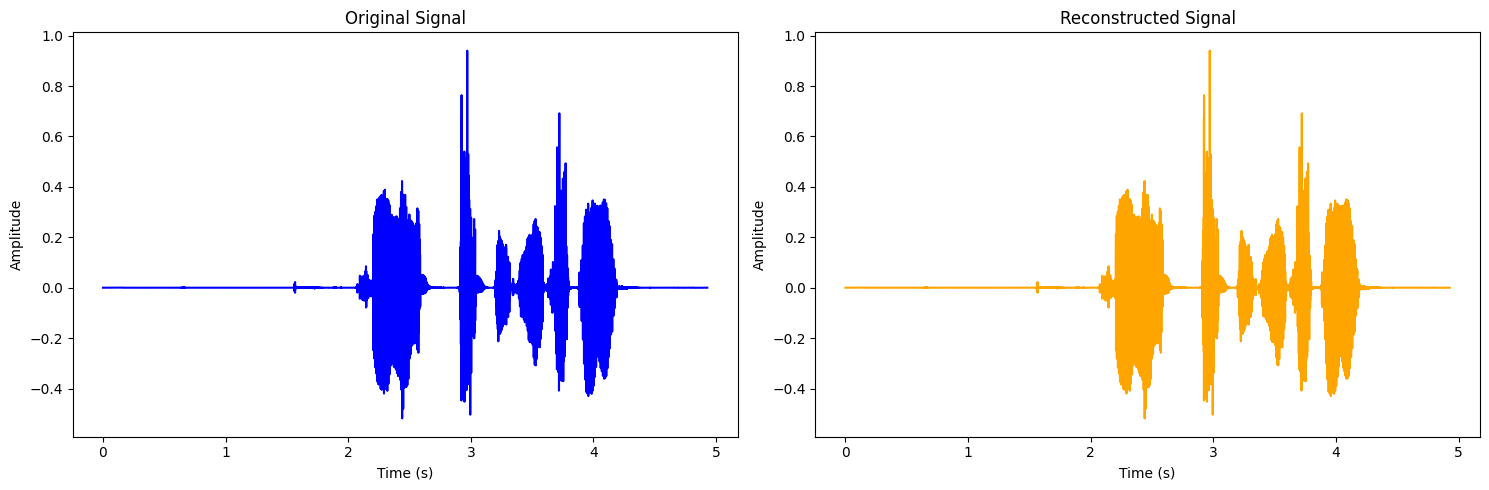

In [21]:
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time, signal, color = "blue")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain_signal,color = "orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()


A3. Perform the spectral analysis of a word present in the recorded speech.Compare the spectrum with the spectrum of the full signal.

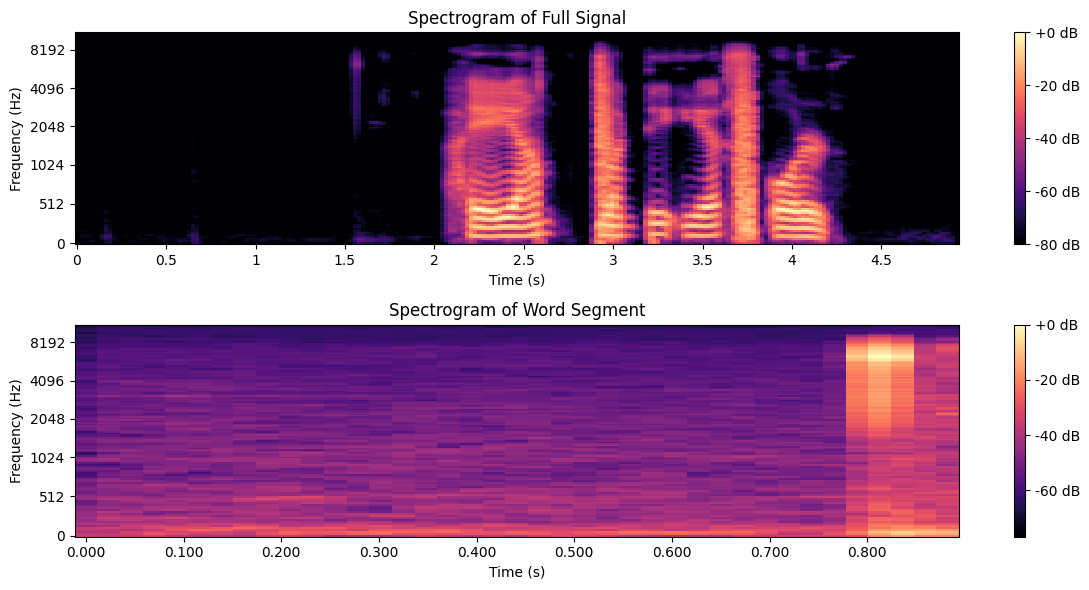

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

path = 'my_statement.wav'
full_signal, sr = librosa.load(path)

word_start_time = 0.75
word_end_time = 1.65

start_sample = int(word_start_time * sr)
end_sample = int(word_end_time * sr)

word_segment = full_signal[start_sample:end_sample]

full_spec = librosa.feature.melspectrogram(y=full_signal, sr=sr)
word_spec = librosa.feature.melspectrogram(y=word_segment, sr=sr)

full_spec_db = librosa.power_to_db(full_spec, ref=np.max)
word_spec_db = librosa.power_to_db(word_spec, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

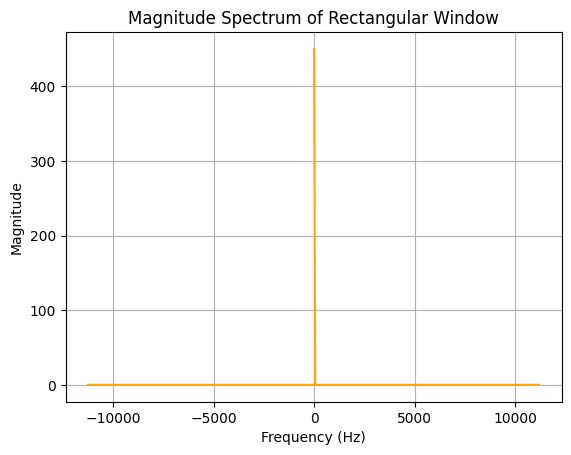

In [14]:
import numpy as np
import matplotlib.pyplot as plt


sampling_rate = 22500 
window_duration = 0.02

window_size = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_size)

fft_result = np.fft.fft(rectangular_window)

frequencies = np.fft.fftfreq(window_size, 1 / sampling_rate)

plt.plot(frequencies, np.abs(fft_result),color = "orange")
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.


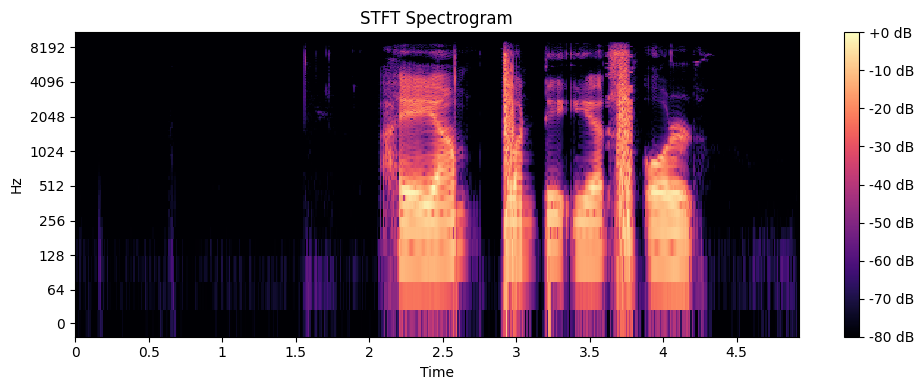

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "my_statement.wav"
audio_signal, sampling_rate = librosa.load(file_path)

window_size = int(0.02 * sampling_rate)
hop_size = int(0.01 * sampling_rate)
stft_matrix = librosa.stft(audio_signal, n_fft=window_size, hop_length=hop_size)
stft_amplitude = np.abs(stft_matrix)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_amplitude, ref=np.max), sr=sampling_rate, hop_length=hop_size, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()


A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.

C:\Users\THOTA SIDDARTHA\AppData\Local\Temp\ipykernel_10792\3924843696.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')


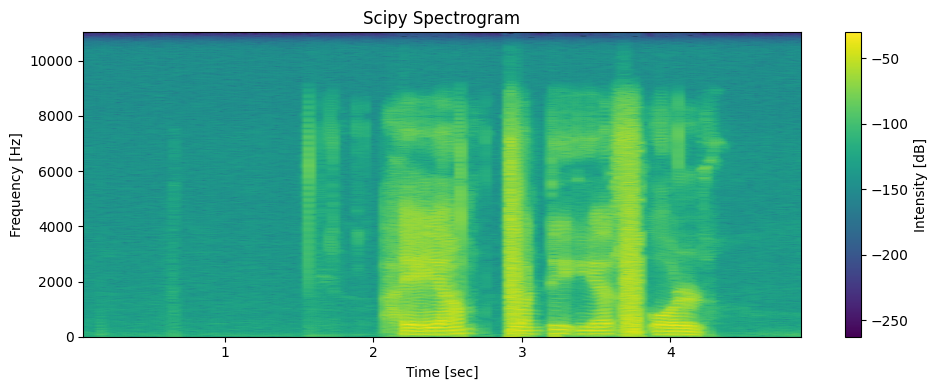

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

file_path = "my_statement.wav"
audio_signal, sampling_rate = librosa.load(file_path)

frequencies, times, spec_scipy = spectrogram(audio_signal, fs=sampling_rate, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()
